<a href="https://colab.research.google.com/github/MakarRybkin/Spotify_popularity_reg/blob/davydova_liza/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_csv("dataset.csv")
df.head()

Saving dataset.csv to dataset.csv


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


Таблица имеет информацию о 114000 треков.  
**Unnamed: 0** - индекс строки;  
**treck_id** - id;    
**artists** - исполнитель;  
**album_name** - имя альбома;  
**track_name** - название трека;  
**popularity** - популярность (0-100);  
**duration_ms** - продолжительность;  
**explicit** - присутсвует ли ненормативная лексика в терке;   
**danceability** - насколько подходит для танцев (0.0 - 0.1);  
**energy** - энергичность (0.0 - 0.1);  
**key** - тональность трека (0 - 11);  
**loudness** - стредняя громкотсь трека в дицебелах (отрицательные значения: чем ближе к 0, тем громче);  
**mode** - лад (1 - мажор, 0 - минор);  
**speechiness** - стпень разговорности (0.0 - 1.0);  
**acousticness** - вероятность того, что трек явдяется аккустическим (0.0 - 0.1);    
**instrumentalness** - вероятность, что трек инструментальный, без вокала (0.0 – 1.0);  
**liveness** - вероятность, что трек записан вживую (0.0 – 1.0);  
**valence** - эмоциональная окраска: от мрачного (0.0) до радостного/позитивного (1.0);  
**tempo** - темп трека в ударах в минуту (BPM);  
**time_signature** - размерность музыкального такта;  
**track_genre** - жанр.


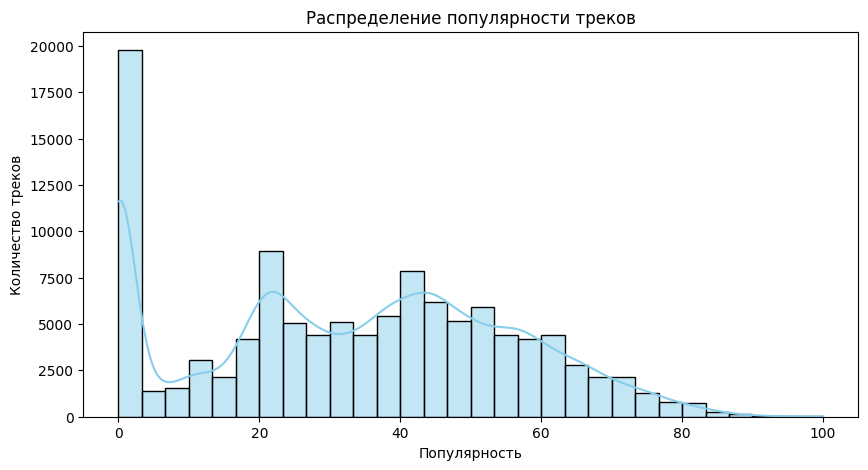

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df["popularity"], bins=30, kde=True, color="skyblue")
plt.title("Распределение популярности треков")
plt.xlabel("Популярность")
plt.ylabel("Количество треков")
plt.show()

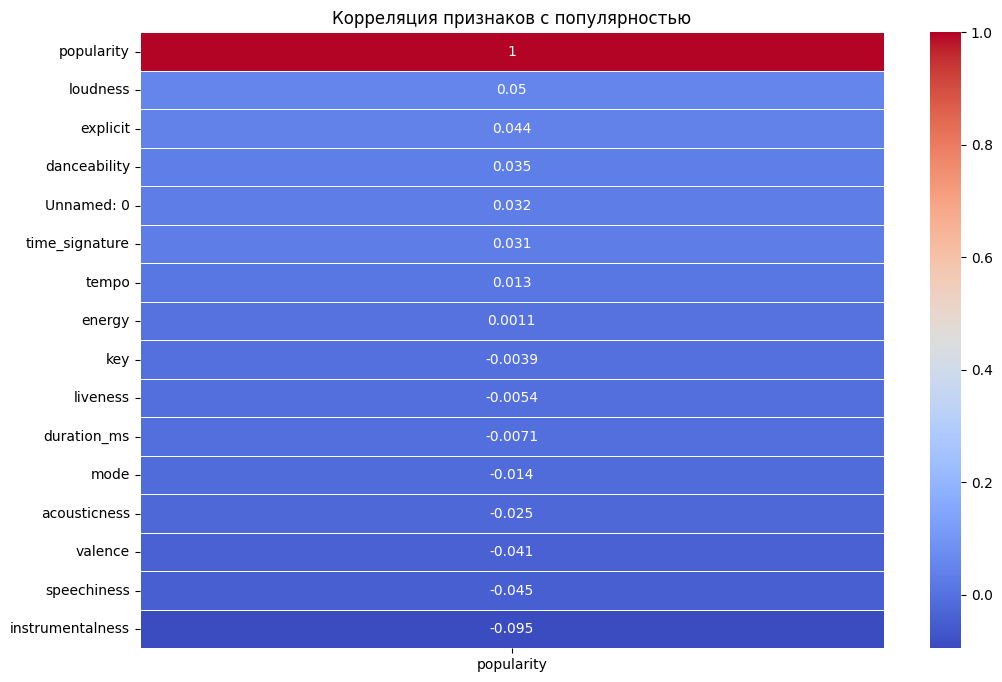

In [ ]:
plt.figure(figsize=(12, 8))
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation[["popularity"]].sort_values(by="popularity", ascending=False), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Корреляция признаков с популярностью")
plt.show()

Кореляция poppularity со всеми колонками - очень маленькая. Это означает почти отсутсвие линейной зависимости.

genre_pop-film     0.109844
genre_k-pop        0.099776
genre_chill        0.086090
genre_sad          0.080726
genre_grunge       0.068980
genre_indian       0.068748
genre_anime        0.065513
genre_emo          0.062797
genre_sertanejo    0.061692
genre_pop          0.060469
Name: popularity, dtype: float64


<ipython-input-6-edeeaeebcb7a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_corr.head(10).values, y=genre_corr.head(10).index, palette="crest")


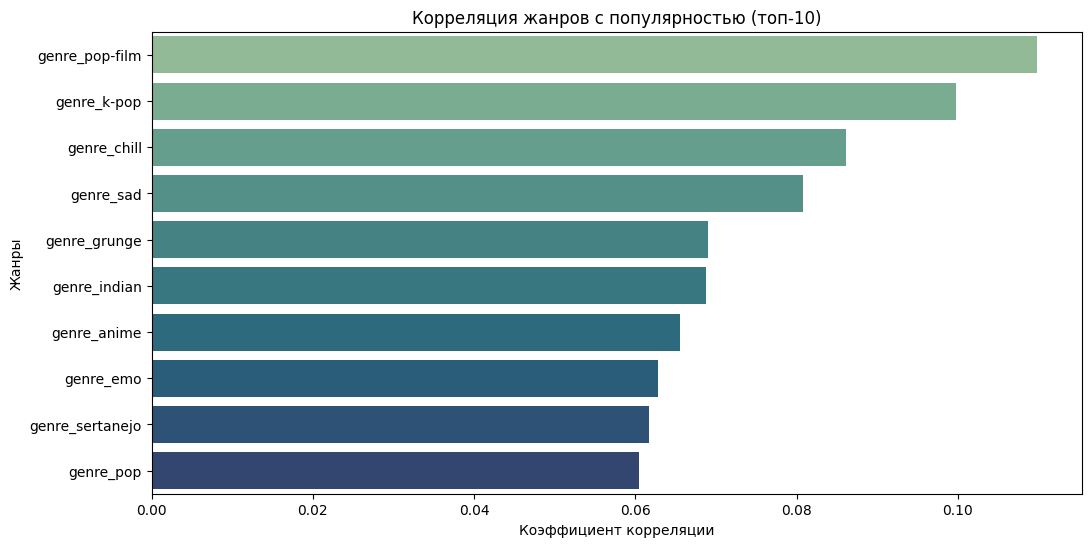

genre_idm              -0.073691
genre_kids             -0.077394
genre_grindcore        -0.078503
genre_jazz             -0.082708
genre_classical        -0.085125
genre_chicago-house    -0.088145
genre_detroit-techno   -0.093058
genre_latin            -0.105192
genre_romance          -0.126499
genre_iranian          -0.130864
Name: popularity, dtype: float64


<ipython-input-6-edeeaeebcb7a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_corr.tail(10).values, y=genre_corr.tail(10).index, palette="flare")


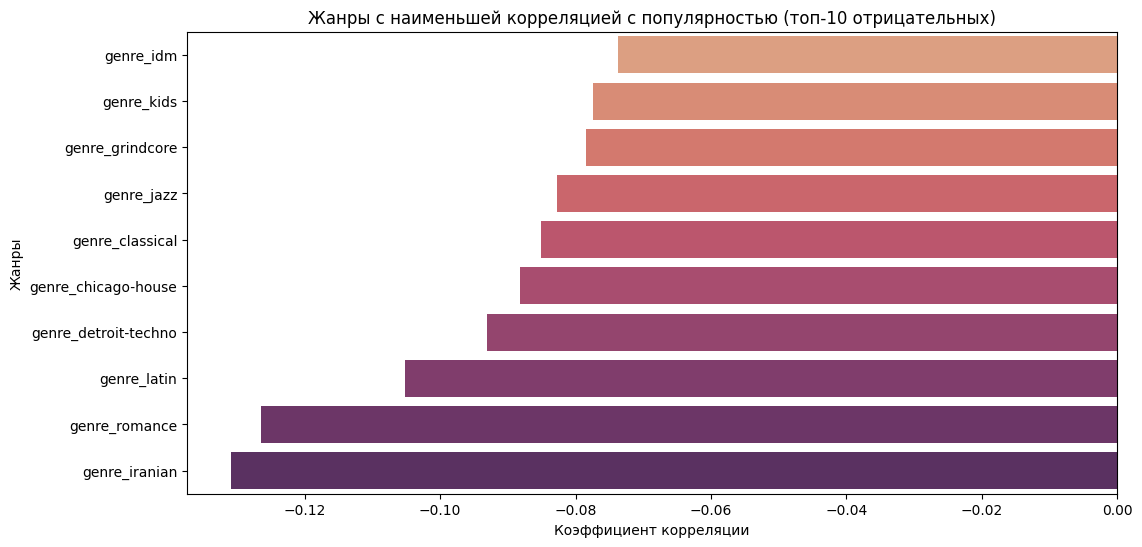

In [ ]:
df_genres = pd.get_dummies(df["track_genre"], prefix="genre", drop_first=True)

df_corr = pd.concat([df[["popularity"]], df_genres], axis=1)
genre_corr = df_corr.corr()["popularity"].drop("popularity").sort_values(ascending=False)

print(genre_corr.head(10))
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_corr.head(10).values, y=genre_corr.head(10).index, palette="crest")
plt.title("Корреляция жанров с популярностью (топ-10)")
plt.xlabel("Коэффициент корреляции")
plt.ylabel("Жанры")
plt.show()

print(genre_corr.tail(10))

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_corr.tail(10).values, y=genre_corr.tail(10).index, palette="flare")
plt.title("Жанры с наименьшей корреляцией с популярностью (топ-10 отрицательных)")
plt.xlabel("Коэффициент корреляции")
plt.ylabel("Жанры")
plt.show()

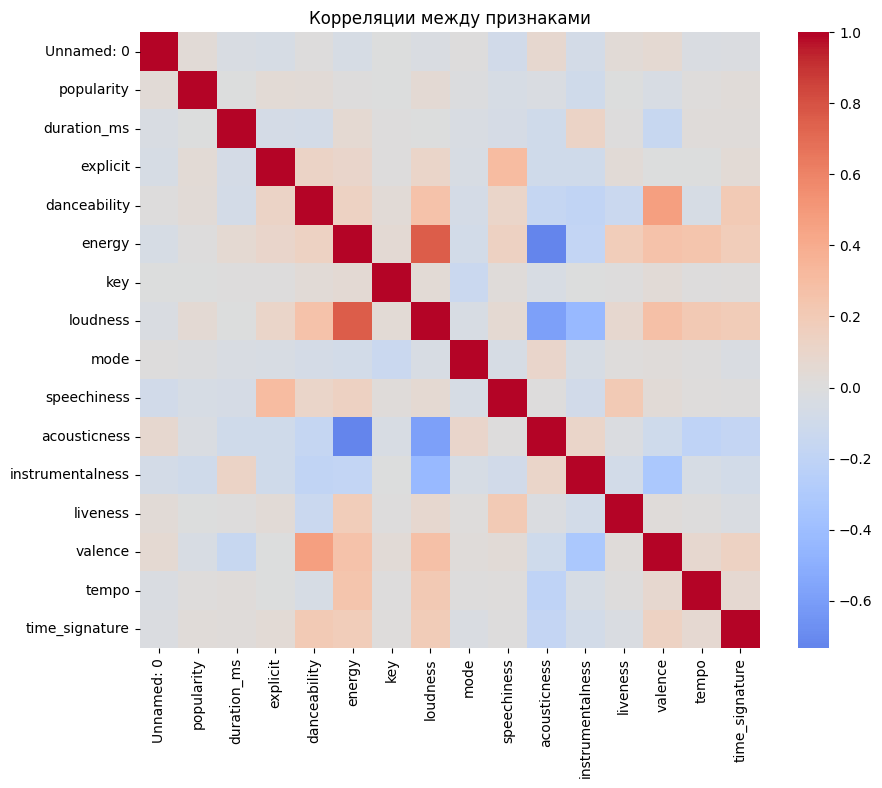

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", center=0)
plt.title("Корреляции между признаками")
plt.show()

<ipython-input-8-941ab38eb5cd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_popularity.index[:20], y=genre_popularity.values[:20], palette="viridis")


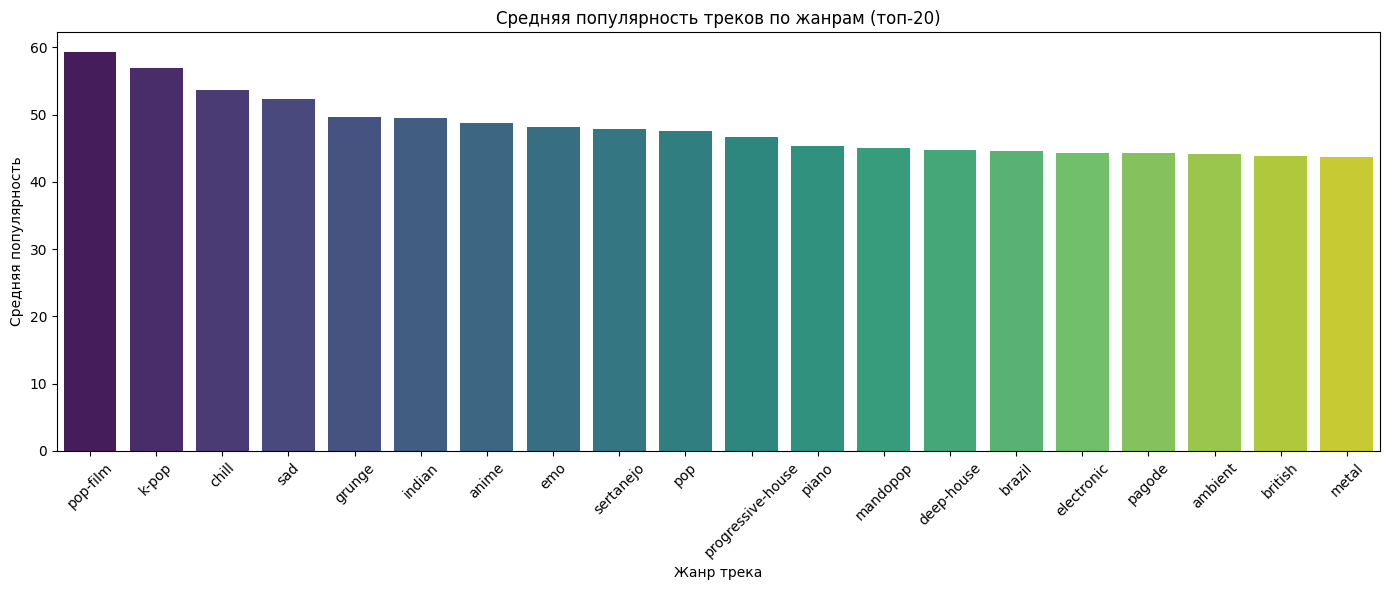

In [ ]:
genre_popularity = df.groupby("track_genre")["popularity"].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=genre_popularity.index[:20], y=genre_popularity.values[:20], palette="viridis")

plt.title("Средняя популярность треков по жанрам (топ-20)")
plt.xlabel("Жанр трека")
plt.ylabel("Средняя популярность")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


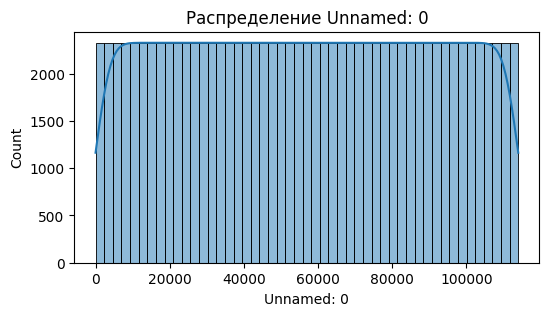

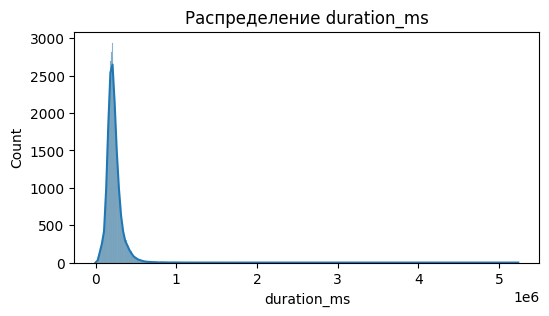

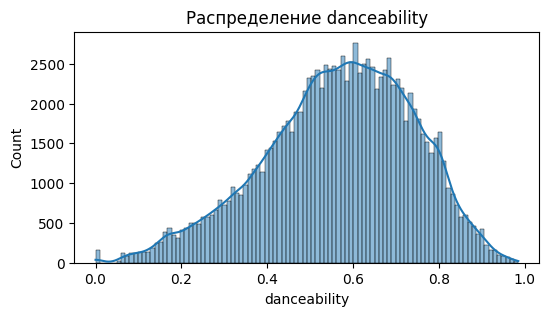

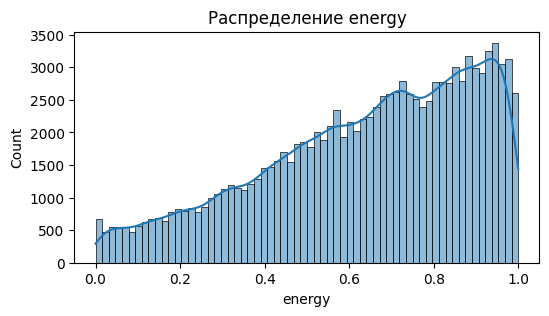

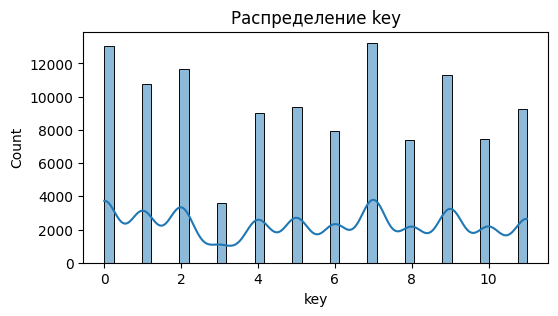

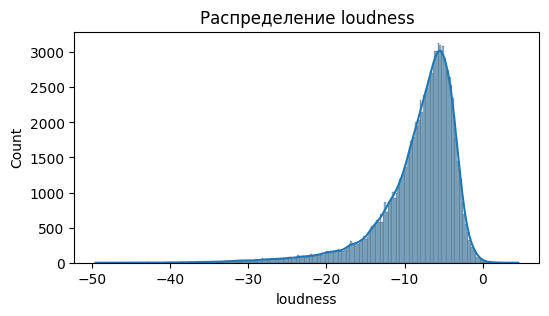

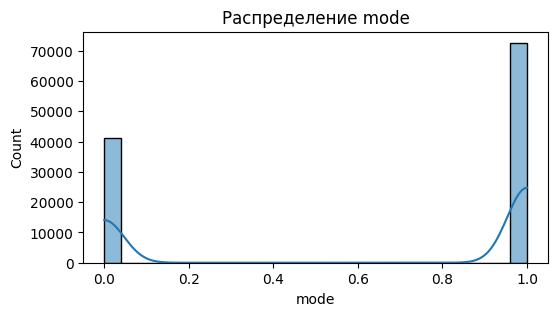

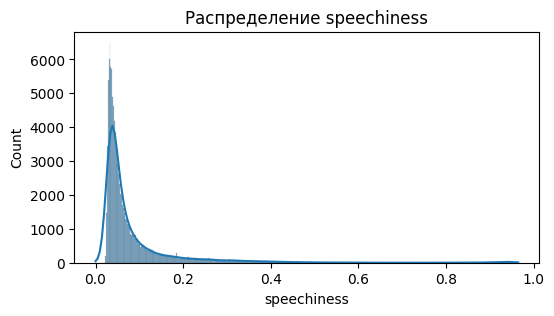

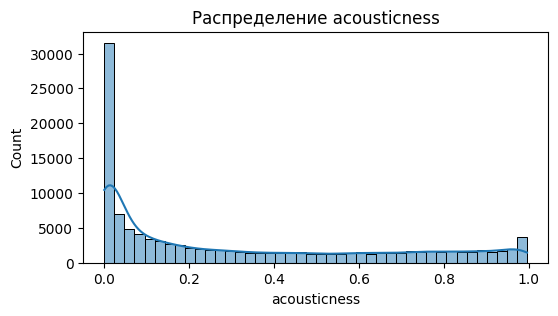

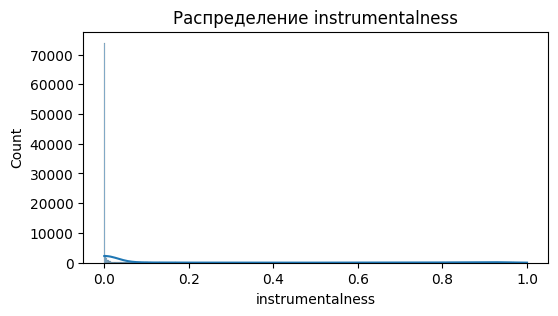

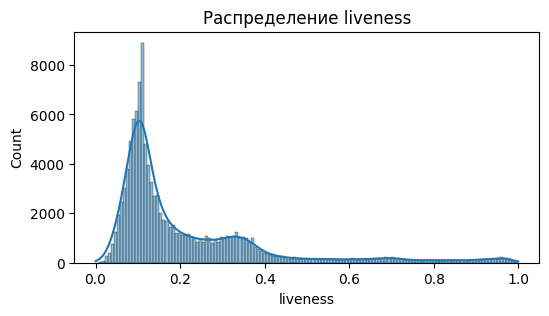

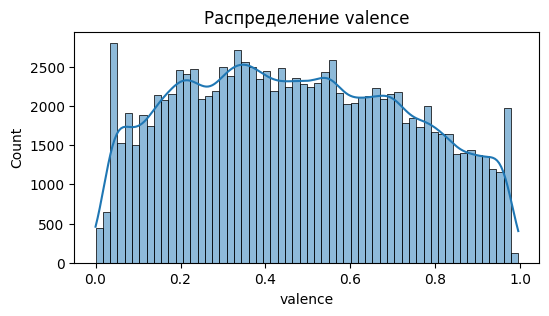

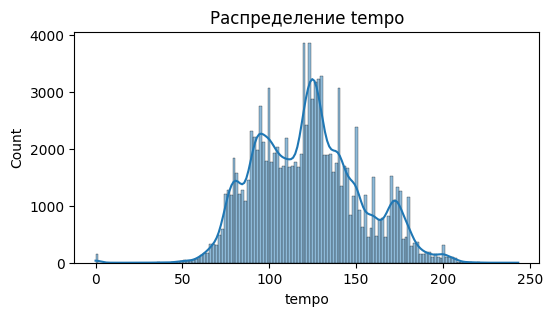

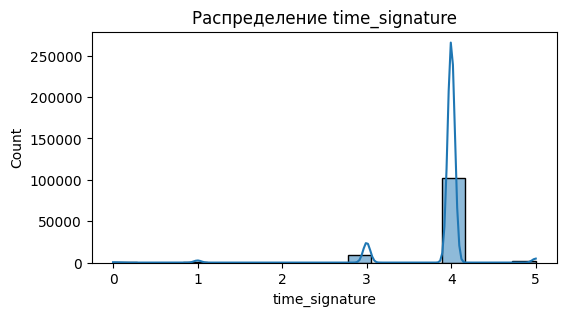

In [ ]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns.drop("popularity")
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Распределение {col}")
    plt.show()

Создание новых критериев

In [ ]:
df["energy_valence"] = df["energy"] * df["valence"]
df["dance_energy"] = df["danceability"] * df["energy"]
df["is_spoken"] = (df["speechiness"] > 0.66).astype(int)
df["tempo_loudness"] = df["tempo"] * df["loudness"]

top_10_genres = [col.replace("genre_", "") for col in genre_corr.head(10).index]
bottom_10_genres = [col.replace("genre_", "") for col in genre_corr.tail(10).index]

selected_genres = top_10_genres + bottom_10_genres

df["top_genre_or_other"] = df["track_genre"].apply(lambda g: g if g in selected_genres else "other")

In [ ]:
new_features = ["energy_valence", "dance_energy", "is_spoken", ]
df[new_features + ["popularity"]].corr()["popularity"].sort_values(ascending=False)


,popularity
popularity,1.000000
dance_energy,0.006060
energy_valence,-0.029298
is_spoken,-0.037085


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [ ]:
df.dropna(inplace=True)

encoder = OrdinalEncoder()
df['top_genre_or_other_encoded'] = encoder.fit_transform(df[['top_genre_or_other']])

df["explicit"] = df["explicit"].astype(int)

features =["danceability", "energy", "loudness", "speechiness", "acousticness",
        "instrumentalness", "valence", "tempo", "duration_ms", "explicit", "top_genre_or_other_encoded"]
X = pd.get_dummies(df[features])
y = df["popularity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model_rf = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=1)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'R²: {r2}')


MAE: 12.531264863020917
R²: 0.45434579347423953


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
print("Linear Regression")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"R²: {r2_score(y_test, y_pred_lr)}\n")

Linear Regression
MAE: 18.378628114498472
R²: 0.023247721470076144



In [ ]:
model_dt = DecisionTreeRegressor(max_depth=20, random_state=1)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
print("Decision Tree Regressor")
print(f"MAE: {mean_absolute_error(y_test, y_pred_dt)}")
print(f"R²: {r2_score(y_test, y_pred_dt)}\n")

Decision Tree Regressor
MAE: 13.915423829566697
R²: 0.2385790255973823



In [ ]:
model_gb = GradientBoostingRegressor(n_estimators=300, max_depth=10, random_state=1)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)
print("Gradient Boosting Regressor")
print(f"MAE: {mean_absolute_error(y_test, y_pred_gb)}")
print(f"R²: {r2_score(y_test, y_pred_gb)}\n")


Gradient Boosting Regressor
MAE: 11.97644532712021
R²: 0.499812513378756



In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=1)
model_mlp.fit(X_train_scaled, y_train)
y_pred_mlp = model_mlp.predict(X_test_scaled)
print("MLP Regressor")
print(f"MAE: {mean_absolute_error(y_test, y_pred_mlp)}")
print(f"R²: {r2_score(y_test, y_pred_mlp)}")


MLP Regressor
MAE: 16.270601279225435
R²: 0.16434519352816723


In [ ]:
model_xgb = xgb.XGBRegressor(n_estimators=500, max_depth=10, random_state=1, use_label_encoder=False, eval_metric='rmse')
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
print("XGBoost Regressor")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"R²: {r2_score(y_test, y_pred_xgb)}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:25:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Regressor
MAE: 9.797258377075195
R²: 0.5448392033576965


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_mlp = MLPRegressor(
    hidden_layer_sizes=(256, 128, 64),
    activation='tanh',
    solver='adam',
    alpha=0.0005,
    learning_rate='adaptive',
    max_iter=2000,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=1
)

model_mlp.fit(X_train_scaled, y_train)

y_pred_mlp = model_mlp.predict(X_test_scaled)

print("MLP Regressor (усиленный)")
print(f"MAE: {mean_absolute_error(y_test, y_pred_mlp):.4f}")
print(f"R²: {r2_score(y_test, y_pred_mlp):.4f}")


MLP Regressor (усиленный)
MAE: 14.5427
R²: 0.2730


Наилучший результат показала модель XGBRegressor
MAE: 9.80
R²: 0.54